In [10]:
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager
from sklearn.datasets import load_sample_image
import mahotas as mh
import cv2
from sklearn.datasets import load_sample_image
import skimage.io as io

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

          R         F         M  类别数目
0 -0.149353 -0.658893 -0.271780   559
1  3.455055 -0.295654  0.449123    40
2 -0.160451  1.114802  0.392844   341


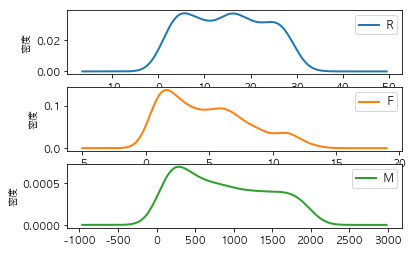

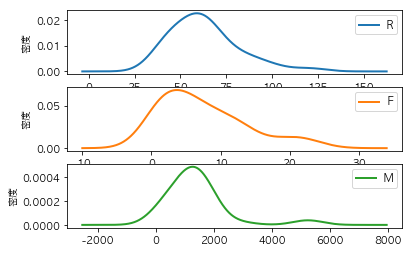

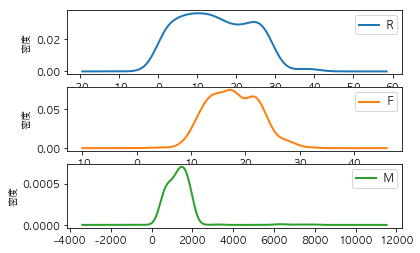

In [3]:
import pandas as pd

inputfile = '../data/consumption_data.xls' 
outputfile = '../tmp/data_type.xls' 
k = 3 
iteration = 500 
data = pd.read_excel(inputfile, index_col = 'Id') 
data_zs = 1.0*(data - data.mean())/data.std() 

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) 
model.fit(data_zs) #开始聚类

r1 = pd.Series(model.labels_).value_counts() 
r2 = pd.DataFrame(model.cluster_centers_) 
r = pd.concat([r2, r1], axis = 1) 
r.columns = list(data.columns) + [u'类别数目'] 
print(r)

r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  
r.columns = list(data.columns) + [u'聚类类别'] 
r.to_excel(outputfile) 


def density_plot(data): 
  import matplotlib.pyplot as plt
  plt.rcParams['font.family'] = 'AppleGothic'   
  plt.rcParams['axes.unicode_minus'] = False 
  p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
  [p[i].set_ylabel(u'密度') for i in range(k)]
  plt.legend()
  return plt

pic_output = '../tmp/pd_' 
for i in range(k):
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))

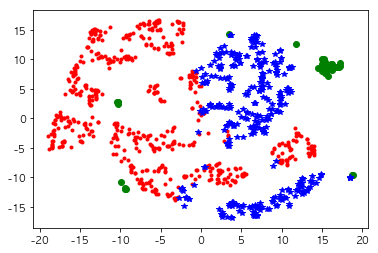

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit_transform(data_zs) 
tsne = pd.DataFrame(tsne.embedding_, index = data_zs.index) 

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')


In [3]:
%matplotlib inline



In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

#不同类别用不同颜色和样式绘图

d = tsne[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')


NameError: name 'tsne' is not defined

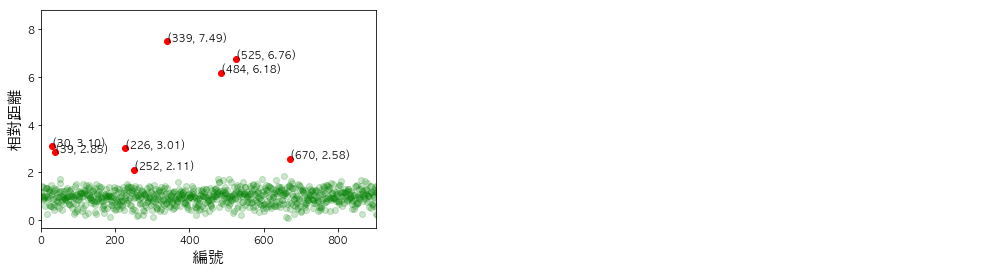

In [36]:

import numpy as np
import pandas as pd

inputfile = '../data/consumption_data.xls' 
k = 3 
threshold = 2 
iteration = 500
data = pd.read_excel(inputfile, index_col = 'Id') 
data_zs = 1.0*(data - data.mean())/data.std() 

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) 
model.fit(data_zs) 


r = pd.concat([data_zs, pd.Series(model.labels_, index = data.index)], axis = 1)  
r.columns = list(data.columns) + [u'聚类类别'] 

norm = []
for i in range(k): 
  norm_tmp = r[['R', 'F', 'M']][r[u'聚类类别'] == i]-model.cluster_centers_[i]
  norm_tmp = norm_tmp.apply(np.linalg.norm, axis = 1) 
  norm.append(norm_tmp/norm_tmp.median()) 

norm = pd.concat(norm) 

import matplotlib.pyplot as plt

#plt.rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['axes.unicode_minus'] = False 
norm[norm <= threshold].plot(style = 'go',alpha=0.2) 

discrete_points = norm[norm > threshold] 
discrete_points.plot(style = 'ro')

for i in range(len(discrete_points)): 
  id = discrete_points.index[i]
  n = discrete_points.iloc[i]
  plt.annotate('(%s, %0.2f)'%(id, n), xy = (id, n), xytext = (id, n))
plt.rcParams['font.family'] = 'AppleGothic' 
plt.xlabel('編號',size=16)
plt.ylabel('相對距離',size=16)


In [14]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='otf')

['/Users/cch/Library/Fonts/Script MT Bold.TTF',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMAdiabene.otf',
 '/Users/cch/Library/Fonts/segoeb.ttf',
 '/System/Library/Fonts/SFNSTextCondensed-Semibold.otf',
 '/usr/X11/lib/X11/fonts/TTF/luxisr.ttf',
 '/Users/cch/Library/Fonts/seguisbi.ttf',
 '/Library/Fonts/STIXIntDBol.otf',
 '/System/Library/Fonts/SFCompactDisplay-Bold.otf',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMBatnanBold.otf',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMJerusalemOutline.otf',
 '/usr/X11/lib/X11/fonts/TTF/luximr.ttf',
 '/Library/Fonts/Times New Roman Bold Italic.ttf',
 '/System/Library/Fonts/SFNSTextCondensed-Light.otf',
 '/System/Library/Fonts/SFCompactDisplay-Semibold.otf',
 '/Users/cch/Library/Fonts/seguibli.ttf',
 '/Library/Fonts/STIXSizOneSymBol.otf',
 '/Users/cch/Library/Fonts/BOD_BLAR.TTF',
 '/Library/Fonts/STIXVar.otf',
 '/System/Library/Fonts/SFNSTextCondensed-Regular.otf',
 '/Library/Fonts/STIXGeneralBol.otf',
 '/Users/cch/Library/Fonts/euphorig.ttf',
 '/Users/cch/Library/Fonts/kil

k-means for color compression
---
One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

For example, consider the image shown in the following figure, which is from the Scikit-Learn datasets module (for this to work, you'll have to have the pillow Python package installed).

(3072, 1728, 3)

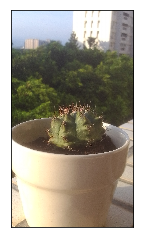

In [11]:
#from sklearn.datasets import load_sample_image
cultus = mh.imread("imgs/cultus.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cultus);
cultus.shape

(3072, 1728, 3)

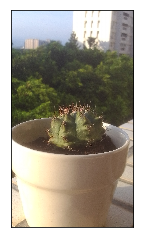

In [14]:
import skimage.io as io
cultus = io.imread("imgs/cultus.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cultus);
cultus.shape

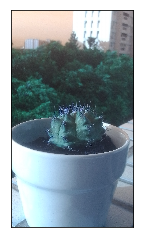

In [5]:
cultus = cv2.imread("imgs/cultus.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cultus);

the output from cv2 is different from them from skimage and mahotas, the latter format in color is in (r,g,b) but former is in (r,g,b), reversely.

```
Image
[ (r,g,b), (r,g,b), ... , (r,g,b)
            ...
  (r,g,b), (r,g,b), ... , (r,g,b) ]
```  
each of (r,g,g) is one 8bit integer between 0 and 255.

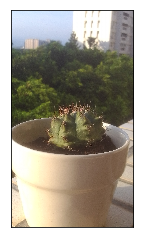

In [6]:
cultus = cv2.imread("imgs/cultus.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cv2.cvtColor(cultus, cv2.COLOR_BGR2RGB));

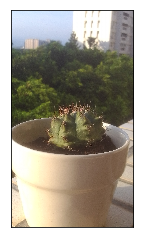

In [20]:
# BGR changed to RGB
b,g,r = cv2.split(cultus)       # get b,g,r
image_rgb = cv2.merge([r,g,b])     # switch it to rgb

plt.imshow(image_rgb)
plt.xticks([]), plt.yticks([]);

In [21]:
b

array([[255, 255, 255, ..., 126, 127, 123],
       [255, 255, 255, ..., 128, 128, 125],
       [255, 255, 255, ..., 129, 129, 126],
       ..., 
       [137, 145, 157, ...,  31,  25,  20],
       [139, 145, 159, ...,  26,  22,  18],
       [141, 141, 150, ...,  19,  20,  22]], dtype=uint8)

In [50]:
image_rgb.shape

(3072, 1728, 3)

In [51]:
data = image_rgb / 255.0 # use 0...1 scale
data = data.reshape(3072 * 1728, 3)
data.shape

(5308416, 3)

In [52]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

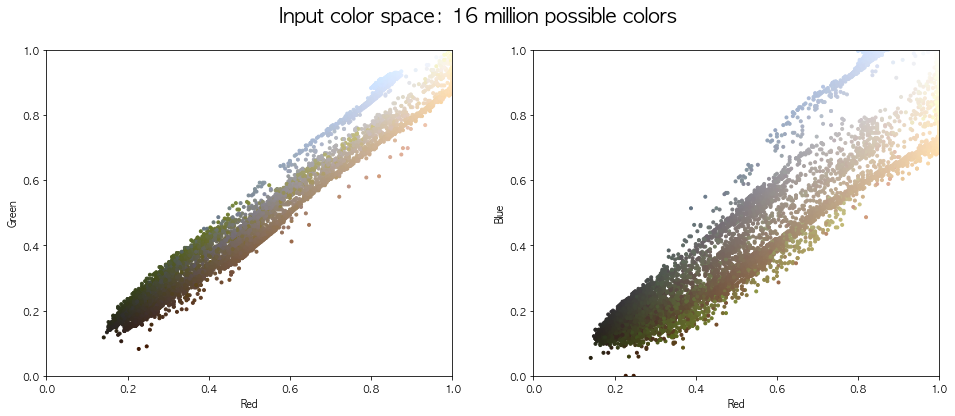

In [53]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

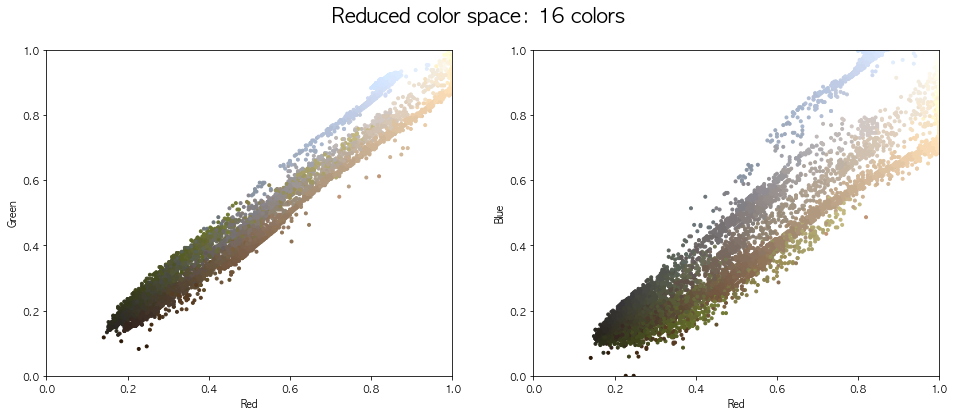

In [58]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(256)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 256 colors")

The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

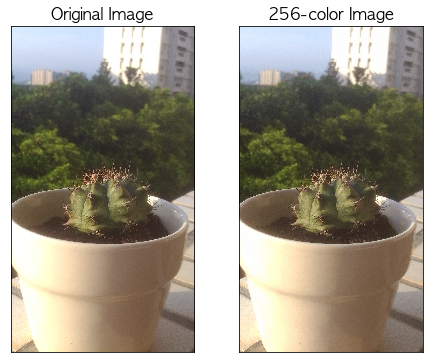

In [59]:
cultus_recolored = new_colors.reshape(image_rgb.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cultus_recolored)
ax[1].set_title('256-color Image', size=16);

Reference
---
- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) 